In [51]:
from pymatgen import Structure
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.symmetry.analyzer import SpacegroupOperations
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.core.operations import SymmOp
from pymatgen.electronic_structure.bandstructure import *
from pymatgen.ext.matproj import MPRester
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.electronic_structure.plotter import*
import matplotlib.pyplot as plt
from pymatgen.io.cif import CifWriter
from IPython.display import FileLink
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.phonon.plotter import *
from pymatgen.phonon.bandstructure import *
import numpy as np
from math import pi, fabs
import pymatgen.phonon.plotter as pp

# 1) Téléchargement du fichier .CIF


In [50]:
#téléchargement des fichiers
key = "OeM7QMOQddQoMGfFB4h"
material = "mp-866132"
material_name = "Na₂TlSb"
with MPRester(key) as m:
    struct = m.get_structure_by_material_id(material,conventional_unit_cell=True)
    w = CifWriter(struct)
    w.write_file(material+".cif") 
    print("Clique sur le lien pour télécharger mon fichier .CIF")
    display(FileLink(material+".cif"))

Clique sur le lien pour télécharger mon fichier .CIF


/home/users/h/u/husimon/lmapr/mp-866132.cif

# 2) Structure de bande des phonons

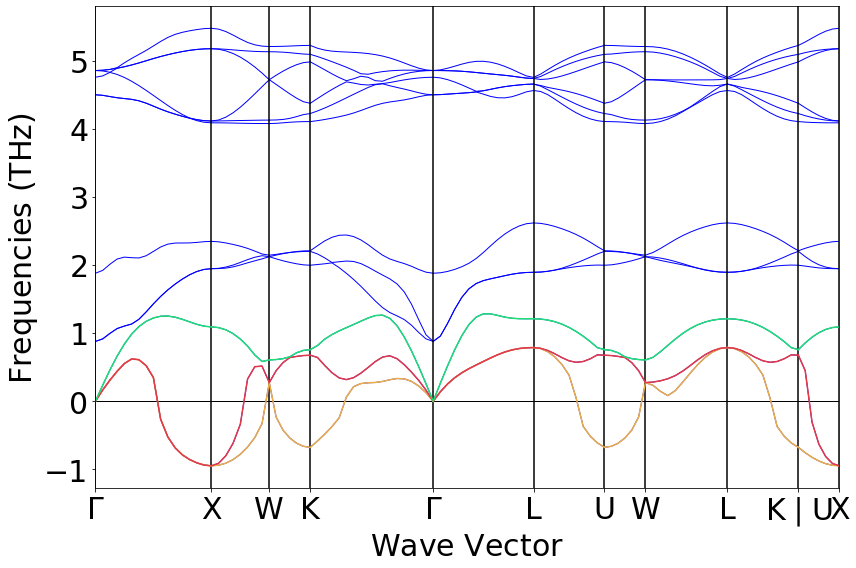

In [46]:
band = m.get_phonon_bandstructure_by_material_id(material)
bsplotter = PhononBSPlotter(band)

ph_bandstruct_plot = pp.PhononBSPlotter(band)
data = bsplotter.bs_plot_data()
distance = data.get("distances")
frequence = data.get("frequency")
ph_bandstruct_plot.get_plot()
for i in range(len(distance)):
    plt.plot(distance[i], frequence[i][0], color = '#EDAE49')
    plt.plot(distance[i], frequence[i][1], color = '#E63946')
    plt.plot(distance[i], frequence[i][2], color = '#1FE074')


Les 3 premières branches sont mises en couleur sur le schéma ci-dessus. 

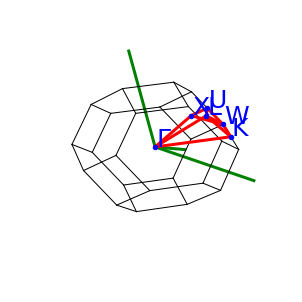

In [47]:
bsplotter.plot_brillouin()

# 3) Calcul de la vitesse du son pour 3 branches acoustiques différentes dans 3 directions différentes dans la zone de Brillouin

Afin de déterminer les branches acoustiques, il faut que l'on trouve les bandes avec une fréquence du phonon nulle au centre de la zone de Brillouin. Nous pouvons donc choisir les 3 directions possibles : Γ-X ; K-Γ et Γ-L

Avec l'hypothèse d'une longueur d'onde élevée, la relation de dispersion peut-être considérée comme linéaire. 
$$\omega = v|\mathbf{q}|$$
Pour $\omega = 2\pi f$ $\pm$ égal à 0, on a :
$$v = \frac{\partial{\omega}}{\partial{\mathbf{q}}}$$
$$v =2\pi \frac{\partial{f}}{\partial{\mathbf{q}}}$$

On estime la dérivée en prenant la pente autour du point.

In [48]:
pi = np.pi
data = bsplotter.bs_plot_data()
distance = data.get("distances")
frequence = data.get("frequency")
#Courbe 1 : 
fd1 = abs((frequence[0][0][1]-frequence[0][0][0])/(10**-12))/((distance[0][1]-distance[0][0])/(10**-10))
v1 = 2*pi*fd1
print("Vitesse du son dans la direction \u0393-X dans la 1ère branche : Vs =" ,str(v1), "[m/s]")
#Courbe 2 :
fd2 = abs((frequence[3][1][-1]-frequence[3][1][-2])/(10**-12))/((distance[3][-1]-distance[3][-2])/(10**-10))
v2= 2*pi*fd2
print("Vitesse du son dans la direction K-\u0393 dans la 2ème branche : Vs =" ,str(v2), "[m/s]")
#Courbe 3 : 
fd3 = abs((frequence[4][2][1]-frequence[4][2][0])/(10**-12))/((distance[4][1]-distance[4][0])/(10**-10))
v3= 2*pi*fd3
print("Vitesse du son dans la direction \u0393-L dans la 3ème branche : Vs =" ,str(v3), "[m/s]")

Vitesse du son dans la direction Γ-X dans la 1ère branche : Vs = 1970.2182775877882 [m/s]
Vitesse du son dans la direction K-Γ dans la 2ème branche : Vs = 1967.429627705496 [m/s]
Vitesse du son dans la direction Γ-L dans la 3ème branche : Vs = 3183.5027873964555 [m/s]


Les vitesses sont différentes selon les directions, on peut donc en conclure que le matériau est anisotrope. 